# Modelo de Regresión Lineal


__Por:__ Ayar Paco

__GitHub:__ https://github.com/ayar-yps/RegresionLinealPython

## 1 Descripción del modelo

El modelo de regresión en general es de la forma:

$$
Y=\mathrm{E}[Y|X]+\varepsilon \\
$$
Donde,

* $Y$: Variable respuesta (Variable aleatoria)
* $X$: Vector predictor o regresor (Vector de variables aleatorias, valores conocidos o ambos)
* $\varepsilon$: Error (Variable aleatoria)

Luego, en un modelo de regresión lineal consideramos que $\mathrm{E}[Y|X]$ es lineal en sus parámetros, esto es:

$$
\mathrm{E}[Y|X]=\beta_0+\sum_{j=1}^{p-1}\beta_jX_j
$$

Entonces, el modelo de regresión lineal tiene forma:

$$
Y=\beta_0+\sum_{j=1}^{p-1}\beta_jX_j+\varepsilon
$$

Ahora, consideremos una muestra independiente e identicamente distribuida de tamaño $n$, 

$$
Y_i=\beta_0 +\beta_1 X_{i1}+...+\beta_{p-1} X_{i(p-1)}+\varepsilon_i \qquad i=1,...,n \\
$$

de forma completa tenemos,

$$
Y_1=\beta_0 1+\beta_1 X_{11}+...+\beta_{p-1} X_{1(p-1)}+\varepsilon_1 \\
Y_2=\beta_0 1+\beta_1 X_{21}+...+\beta_{p-1} X_{2(p-1)}+\varepsilon_2 \\
\vdots\\
Y_n=\beta_0 1+\beta_1 X_{n1}+...+\beta_{p-1} X_{n(p-1)}+\varepsilon_n
$$

Matricialmente,

$$
\Large \mathbf{Y} = \mathbf{X} \mathbf{B}+ \mathcal{E}
$$

Ahora veamos las condiciones que deben cumplirse cuando se consideran regresores estocásticos o fijos.

__Condiciones del modelo para regresores estocásticos__
    
* $\mathrm{E}[\mathcal{E}|\mathbf{X}]=0$
* $\mathrm{Var}[\mathcal{E}|\mathbf{X}]=\sigma^2 \mathbf{I}_n$
* $Rang(\mathbf{X})=p$
* $\mathcal{E}|\mathbf{X} \sim N_n(0,\sigma^2 \mathbf{I}_n)$ (para fines de inferencia)

__Condiciones del modelo para regresores fijos__

* $\mathrm{E}[\mathcal{E}]=0$
* $\mathrm{Var}[\mathcal{E}]=\sigma^2\mathbf{I}_n$
* $Rang(\mathbf{X})=p$
* $\mathcal{E} \sim N_n(0,\sigma^2 \mathbf{I}_n)$ (para fines de inferencia)

__Nota:__ Si bien en general los regresores $X_j$ pueden ser estocásticos (variables aleatorias) o fijos (valores conocidos), por conveniencia resulta práctico considerar que todos son fijos. Esta suposición no quita generalidad a los resultados de los siguientes puntos puesto que tomando regresores estocásticos llegamos a los mismos resultados considerando los respectivos supuestos.

Dicho esto continuamos el desarrollo considerando el modelo de regresión lineal con regresores fijos.

## 2  Estimación de parámetros

Para estimar los parámetros del modelo minimizaremos una función de costo respecto a los errores. Es decir, los estimadores serán los valores que logren minimizar esta función.

Consideremos el siguiente ejemplo.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Tamaño de muestra
n=100

# Regresores
np.random.seed(8888)
x1 = np.random.uniform(low=0, high=15, size=(n,))
np.random.seed(4258)
x2 = np.random.uniform(low=20, high=80, size=(n,))
np.random.seed(3456)
x3 = np.random.uniform(low=10, high=40, size=(n,))

# Error
np.random.seed(4321)
E = np.random.normal(loc=0.0, scale=10, size=n)

# Variable respuesta
Y=20.5+3.8*x1+6.5*x2+10*x3+E

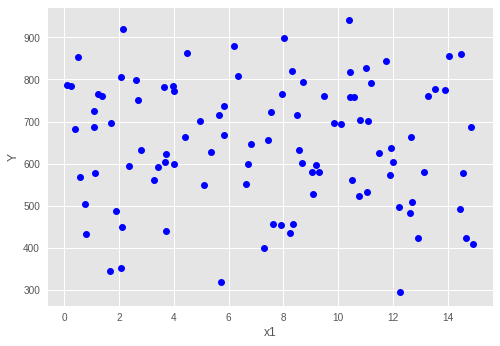

In [0]:
plt.plot(x1,Y,'o',color='blue')
plt.ylabel("Y")
plt.xlabel("x1")
plt.show()

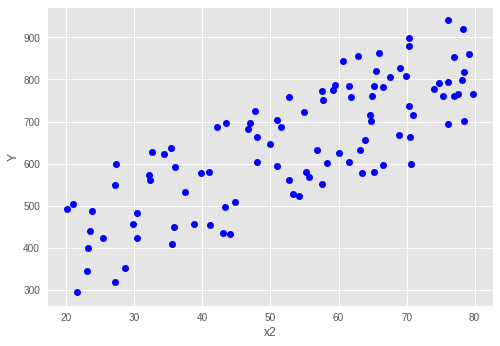

In [0]:
plt.plot(x2,Y,'o',color='blue')
plt.ylabel("Y")
plt.xlabel("x2")
plt.show()

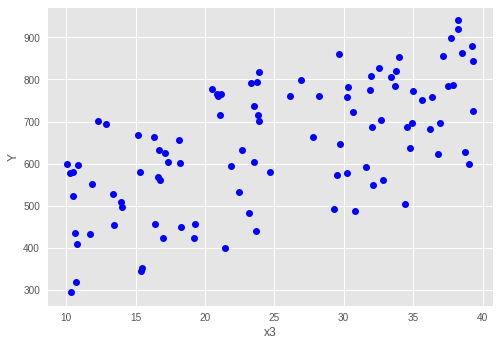

In [0]:
plt.plot(x3,Y,'o',color='blue')
plt.ylabel("Y")
plt.xlabel("x3")
plt.show()

### 2.1 Ecuaciones Normales

Aplicando MCO, minimizaremos la suma de cuadrados de los errores, esto es

$$
\begin{align*}
\min \limits_{\beta_0,...,\beta_{p-1}} \varphi &= \sum_{i=1}^{n}\varepsilon_i^2
&
\qquad \min\limits_{\mathbf{B}} \varphi &=  \mathcal{E}'\mathcal{E}\\
\min \limits_{\beta_0,...,\beta_{p-1}} \varphi &= \sum_{i=1}^{n}\Big(Y_i - \beta_0 - \sum_{j=1}^{p-1}\beta_j x_{ij}\Big)^2
&
\qquad \min \limits_{\mathbf{B}} \varphi &= (\mathbf{Y} - \mathbf{X} \mathbf{B})'(\mathbf{Y} - \mathbf{X} \mathbf{B})
\end{align*}
$$

Derivando $\varphi$ respecto a $\mathbf{B}$, tenemos:

$$
\frac{\partial \varphi}{\partial \mathbf{B}}=-2\mathbf{X}'\mathbf{Y}+2\mathbf{X}'\mathbf{X}\mathbf{B}
$$

igualando a cero, el estimador MCO de $\mathbf{B}$ es:

$$
\hat{\mathbf{B}}=(\mathbf{X}'\mathbf{X})^{-1}\mathbf{X}'\mathbf{Y}
$$

__Nota:__ El anterior resultado se denomina ecuación normal. Nótese que es una ecuación vectorial por lo que en realidad se tienen $p$ ecuaciones.

____________________

Obtengamos los estimadores de los parámetros de nuestro ejemplo usando esta ecuación.

In [0]:
# Definamos nuestra matriz de datos...
x0 = np.ones(n)
aux = np.column_stack((x0,x1,x2,x3))
X = np.matrix(aux)

# Ojo..
print(Y.T.shape)
print(Y.shape)

(100,)
(100,)


In [0]:
# Arreglemos esto...
Y.shape = (n,1)
print(Y.shape)
print(Y.T.shape)

(100, 1)
(1, 100)


In [0]:
# Ahora si...
XtXinv = np.linalg.inv(np.dot(X.T,X))
XtY =np.dot(X.T,Y)
B_hat = np.dot(XtXinv,XtY)
print(B_hat)

[[26.79295998]
 [ 3.2388939 ]
 [ 6.57385373]
 [ 9.73114711]]


### 2.2 Gradient Descent

Primero, para mantener la notación estándar consideremos que

$$
\begin{align*}
\theta&=\mathbf{B} & (\theta_0,...\theta_{p-1})'=(\beta_0,...\beta_{p-1})'\\
h_{\theta}(\mathbf{x}_i)=\theta_0 + \sum_{j=1}^{p-1}\theta_j x_{ij}&=\mathbf{x}_i'\mathbf{B}=\beta_0 + \sum_{j=1}^{p-1}\beta_j x_{ij}
\end{align*}
$$

Ahora, tomaremos la siguiente función de costo, que es muy similar a la que usamos anteriormente.

$$
J(\theta) = \frac{1}{2}\sum_{i=1}^{n}\Big(h_{\theta}(\mathbf{x}_i)-Y_i\Big)^2
$$

Luego, de igual forma nos interesa encontrar los valores de $\theta$ que minimizan esta función. Esto es

$$
\begin{align*}
\min \limits_{\theta} J(\theta) = \frac{1}{2}\sum_{i=1}^{n}\Big(h_{\theta}(\mathbf{x}_i)-Y_i\Big)^2
\qquad
\min \limits_{\beta_0,...,\beta_{p-1}} J(\theta_0,...,\theta_{p-1}) = \frac{1}{2}\sum_{i=1}^{n}\Big(\theta_0 + \sum_{j=1}^{p}\theta_j x_{ij}-Y_i\Big)^2 \\
\end{align*}
$$

__Solución al problema de optimización__

Si bien el problema es el mismo, ahora tomaremos un enfoque distinto, inicializaremos $\theta$ de forma aleatoria como nuestra primera adivinaza y posteriormente actualizaremos su valor de tal forma que en cada actualización obtengamos un valor de $J(\theta)$ menor.

Para actualizar el valor de $\theta$, sin embargo necesitamos saber si incrementar o decrementar su valor. Para esto, usaremos el gradiente de $J(\theta)$ respecto a $\theta$. Esto es

$$
\begin{align}
\frac{\partial}{\partial \theta_0}J(\theta)&=\sum_{i=1}^{n}\Big(\theta_0 + \sum_{j=1}^{p}\theta_j x_{ij}-Y_i\Big)*1
& \frac{\partial}{\partial \theta_0}J(\theta)&=\sum_{i=1}^{n}1*\Big(\theta_0 + \sum_{j=1}^{p}\theta_j x_{ij}-Y_i\Big)
\\
\frac{\partial}{\partial \theta_1}J(\theta)&=\sum_{i=1}^{n}\Big(\theta_0 + \sum_{j=1}^{p}\theta_j x_{ij}-Y_i\Big)*x_{i1} 
& \frac{\partial}{\partial \theta_0}J(\theta)&=\sum_{i=1}^{n}x_{i1}*\Big(\theta_0 + \sum_{j=1}^{p}\theta_j x_{ij}-Y_i\Big)
\\
\vdots && \vdots\\
\frac{\partial}{\partial \theta_{p-1}}J(\theta)&=\sum_{i=1}^{n}\Big(\theta_0 + \sum_{j=1}^{p}\theta_j x_{ij}-Y_i\Big)*x_{i(p-1)}
& \frac{\partial}{\partial \theta_0}J(\theta)&=\sum_{i=1}^{n}x_{i(p-1)}*\Big(\theta_0 + \sum_{j=1}^{p}\theta_j x_{ij}-Y_i\Big)
\end{align}
$$

Matricialmente,

$$
\frac{\partial}{\partial \theta}J(\theta)=\mathbf{X}'(\mathbf{X}\theta-Y) 
$$

Luego, en cada actualización de $\theta$ tenemos

$$
\begin{align}
\theta &:= \theta-\alpha*\frac{\partial}{\partial \theta}J(\theta) \\
\theta &:= \theta-\alpha*\mathbf{X}'(\mathbf{X}\theta-Y) 
\end{align}
$$

Donde,

* $\alpha$: Taza de aprendizaje (learning rate).

Ahora nos queda determinar cuantas veces debe actualizarse el valor de $\theta$. Intuitivamente es muy probable que se nos ocurra considerar un epsilon tal que cuando la norma del gradiente sobrepase este valor dejemos de iterar. Este enfoque es raramente usado en la práctica, en lugar de eso consideramos un numero finito de iteraciones denominados "epocs".

Con todas las piezas, formalicemos el algoritmo de gradient descent.

__Algoritmo:__

   1. Inicializar $\theta$ aleatoriamente
   2. Definir $\alpha$ y el número de iteraciones $epocs$
   3. Para $k$ de $1$ a $epocs$:
        * $\theta := \theta-\alpha*\frac{\partial}{\partial \theta}J(\theta)$

__Nota:__ Es importante notar que al usar gradient descent obtenemos un estimador de $\theta$ y por tanto deberíamos usar la notación $\hat{\theta}$. Lastimosamente en ML muchos autores cambian la notación a su gusto tratando de redescubrir notaciones ya establecidas en la teoría matemática y estadística.

__Gradient Descent Normalizado__

Notemos que según la dimensión de las variables habrán valores de $\alpha$ que aceleren el proceso de optimización. Podríamos definir valores $\alpha_j$ por cada variable de acuerdo a sus respectivas escalas. Para usar un único $\alpha$ y evitar que tengamos que cambiar su valor muy seguido, resulta conveniente normalizar los datos. Una variable se puede normalizar de distintas formas, una de las más conocidas es hacer que su promedio sea cero y su varianza uno. Esto es:

$$
z_{ij} = \frac{x_{ij}-\overline{x}_j}{\sqrt{S_{x_j}^2}}
$$

El modelo lineal respecto a las variables predictoras estandarizadas entonces es:

$$
\mathbf{Y}=\mathbf{Z}\mathbf{C}+\mathbf{\xi}
$$

Donde $Z$ es una matriz cuya primera columna tiene unos y el resto son las variables estandarizadas.

Luego, una vez normalizados los datos, podemos usar gradient descent para obtener el estimador de $\mathbf{C}$.

Finalmente, para recuperar los coeficientes no estandarizados usamos:

$$
\begin{align}
\hat{\beta}_j&=\frac{\hat{c}_j}{\sqrt{S_{X_j}^2}} \qquad j=1,...,p-1 \\
\hat{\beta}_0&=\hat{c}_0-\sum_{j=1}^{p-1}\hat{\beta}_j\overline{x}_j
\end{align}
$$

__Nota:__ También podríamos normalizar la variable de respuesta $\mathbf{Y}$. En dicho caso, los coeficientes no estandarizados se recuperan usando otras transformaciones.
__________________________________________
Obtengamos ahora los estimadores de nuestro modelo de ejemplo usando gradient descent.

In [0]:
# Primero estandaricemos nuestras variables....
z0 = np.copy(x0)
z1 = (x1 - np.mean(x1))/np.std(x1)
z2 = (x2 - np.mean(x2))/np.std(x2)
z3 = (x3 - np.mean(x3))/np.std(x3)

# Definamos nuestra matriz de datos estandarizados...
aux = np.column_stack((z0,z1,z2,z3))
Z = np.matrix(aux)

In [0]:
# Definamos la función del costo...
def costo(theta, X, Y):
    costo = (1/2)*sum(np.power((np.dot(X,theta)-Y),2))
    return(costo)

In [0]:
# Definamos la función del gradiente del costo...
def grad_costo(theta, X, Y):
    grad_costo = np.dot(X.T,
                        np.dot(X,theta)-Y)
    return(grad_costo)

In [0]:
# Definamos el algoritmo de gradient descent...
def gradient_descent(X, Y, alpha=0.01, epocs=1000):
    c = np.zeros(epocs)
    np.random.seed(1432)
    theta = np.random.uniform(low=0, high=1, size=(X.shape[1],1))
    for i in range(epocs):
        c[i] = costo(theta, X, Y)
        theta = theta-alpha*grad_costo(theta, X, Y)
    return(theta, c)

In [0]:
# Obtengamos los estimadores...
C_gd, c = gradient_descent(Z, Y, alpha=0.001, epocs=100)
print(C_gd)

[[645.77438576]
 [ 14.21359118]
 [113.64555245]
 [ 90.04283691]]


In [0]:
# Comparemos con los estimadores estandarizados
# usando las ecuaciones normales...
ZtZinv = np.linalg.inv(np.dot(Z.T,Z))
ZtY =np.dot(Z.T,Y)
C_hat = np.dot(ZtZinv,ZtY)
print(C_hat)

[[645.7915137 ]
 [ 14.22971854]
 [113.64593837]
 [ 90.05883456]]


In [0]:
# Finalmente, obtengamos los estimadores no estandarizados...
B_gd=np.zeros((4,1))
B_gd[1,]=C_gd[1,]/np.std(x1)
B_gd[2,]=C_gd[2,]/np.std(x2)
B_gd[3,]=C_gd[3,]/np.std(x3)
B_gd[0,]=C_gd[0,]-(B_gd[1,]*np.mean(x1)
                   +B_gd[2,]*np.mean(x2)
                   +B_gd[3,]*np.mean(x3))
print(B_gd)

[[26.84728739]
 [ 3.23522308]
 [ 6.5738314 ]
 [ 9.72941852]]


In [0]:
# Comparemos con los estimadores no estandarizados
# usando las ecuaciones normales...
print(B_hat)

[[26.79295998]
 [ 3.2388939 ]
 [ 6.57385373]
 [ 9.73114711]]


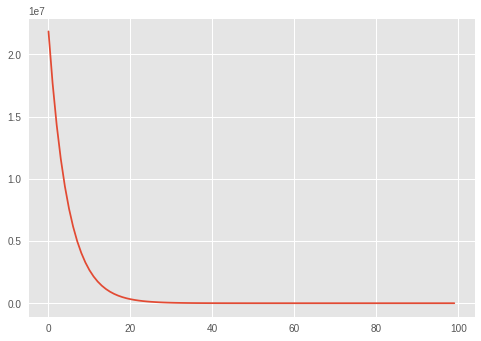

In [0]:
# ¡Genial! logramos obtener estimadores muy próximos a los óptimos analíticos.

# Por último, veamos como fue reduciendo el costo...
plt.plot(c)
plt.show()

[[1.16599344]
 [2.44219548]
 [7.69619579]
 [8.42023824]]


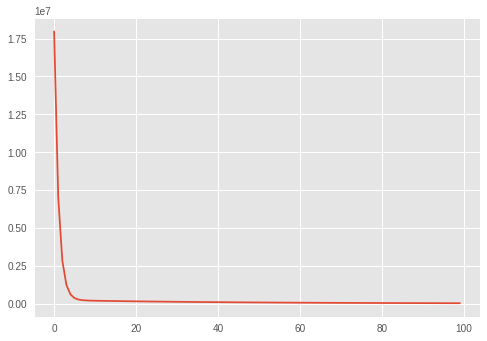

In [0]:
#...momento! y si no hubiesemos normalizado los datos??
B_gd2, c2 = gradient_descent(X, Y, alpha=0.000001, epocs=100)
print(B_gd2)
plt.plot(c2)
plt.show()

## 3  Selección de variables

### 3.1 Stepwise

Stepwise es un metodo iterativo para selecionar variables. Al usarlo partimos con un modelo base y en cada iteración incorporamos o quitamos variables tomando algún criterio de selección.

__Criterio de Información de Akaike__

Un criterio muy usado es el Criterio de Información de Akaike (AIC). Para un modelo de regresión lineal el AIC esta definido como:

$$
AIC = 2k + n\ln \Big(\frac{SCR}{n}\Big)+n\ln(2\pi)+n
$$

Sin embargo, como $2\pi$ es constante y $n$ es igual para todos los modelos lineales a comparar, el $AIC$ se puede calcular como:

$$
AIC = 2k + n\ln \Big(\frac{SCR}{n}\Big)
$$

donde,

* $k$: Número de parámetros.

* $n$: Número de observaciones

* $SCR$: Suma de cuadrados de los residuos.

Calculemos el AIC para un nuevo modelo de ejemplo:

In [0]:
# Definamos otras variables....
x4 = x1*x2
np.random.seed(77)
x5 = np.random.uniform(low=5, high=15, size=(n,))

# Ahora nuestro modelo será....
Y2 = 20.5+6.5*x2+2*x3+0.5*x4+E

In [0]:
# Recordemos que no sabemos como se comporta Y2, y por tanto podríamos 
# pensar que sus regresores son solo x1 y x5...
X2 = np.column_stack((x0,x1,x5))

# Ahora usaremos una libreía de python para facilitar la estimación...
import statsmodels.api as sm
lm_base = sm.OLS(Y2,X2).fit()
lm_base.params

array([572.74962775,  25.46106589, -14.90903673])

In [0]:
# El AIC de este modelo es...
SCR = sum(np.power(Y2-lm_base.fittedvalues,2))
AIC = 2*3+n*np.log(SCR/n)+n*np.log(2*np.pi)+n
AIC

1326.0672213915059

In [0]:
# Comparemos con el AIC que se calcula en la librería...
lm_base.aic

1326.0672213915059

__Ejemplo Stepwise__

La mejor manera de entender stepwise es usarlo así que seleccionemos variables para nuestro ejemplo...

In [0]:
# Definamos una función para generar modelos y retornar el AIC...
def gen_model(Y,X,variables):
    lm = sm.OLS(Y,X[:,variables]).fit()
    return(round(lm.aic,2), lm)

In [0]:
# Ahora si.... 

#Primero, nuestro horizonte será el modelo que incluye todas las 
# varaibles que definimos anteriormente: x1,...,x5
Xh = np.column_stack((x0,x1,x2,x3,x4,x5))

# Modelo base
print("Base: x0,x1,x5\n AIC = "+str(gen_model(Y2,Xh,[0,1,5])[0]))

# Paso 1:
# Variables en el modelo: x0, x1, x5
# Candidatos para incorporarse: x2, x3, x4
# Candidatos para quitarse: x1, x3
print("------------------------------------------")
print(" Paso 1")
print("------------------------------------------")
print("Base + x2\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,2])[0]))
print("Base + x3\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,3])[0]))
print("Base + x4\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,4])[0]))
print("Base - x1\n AIC = "+str(gen_model(Y2,Xh,[0,5])[0]))
print("Base - x5\n AIC = "+str(gen_model(Y2,Xh,[0,1])[0]))

Base: x0,x1,x5
 AIC = 1326.07
------------------------------------------
 Paso 1
------------------------------------------
Base + x2
 AIC = 1050.53
Base + x3
 AIC = 1326.92
Base + x4
 AIC = 1118.27
Base - x1
 AIC = 1356.93
Base - x5
 AIC = 1329.65


In [0]:
# Nuestra mejor alternativa es incorporar x2
print("Base: x0,x1,x5,x2\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,2])[0]))

# Paso 2:
# Variables en el modelo: x0, x1, x5, x2
# Candidatos para incorporarse: x3, x4
# Candidatos para quitarse: x1, x5, x2
print("------------------------------------------")
print(" Paso 2")
print("------------------------------------------")
print("Base + x3\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,2,3])[0]))
print("Base + x4\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,2,4])[0]))
print("Base - x1\n AIC = "+str(gen_model(Y2,Xh,[0,5,2])[0]))
print("Base - x5\n AIC = "+str(gen_model(Y2,Xh,[0,1,2])[0]))
print("Base - x2\n AIC = "+str(gen_model(Y2,Xh,[0,1,5])[0]))

Base: x0,x1,x5,x2
 AIC = 1050.53
------------------------------------------
 Paso 2
------------------------------------------
Base + x3
 AIC = 1040.04
Base + x4
 AIC = 876.92
Base - x1
 AIC = 1239.06
Base - x5
 AIC = 1049.2
Base - x2
 AIC = 1326.07


In [0]:
# Nuestra mejor alternativa es incorporar x4
print("Base: x0,x1,x5,x2,x4\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,2,4])[0]))

# Paso 3:
# Variables en el modelo: x0, x1, x5, x4, x2
# Candidatos para incorporarse: x3
# Candidatos para quitarse: x1, x5, x4, x2
print("------------------------------------------")
print(" Paso 3")
print("------------------------------------------")
print("Base + x3\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,2,4,3])[0]))
print("Base - x1\n AIC = "+str(gen_model(Y2,Xh,[0,5,2,4])[0]))
print("Base - x5\n AIC = "+str(gen_model(Y2,Xh,[0,1,2,4])[0]))
print("Base - x2\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,4])[0]))
print("Base - x4\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,2])[0]))

Base: x0,x1,x5,x2,x4
 AIC = 876.92
------------------------------------------
 Paso 3
------------------------------------------
Base + x3
 AIC = 756.3
Base - x1
 AIC = 877.44
Base - x5
 AIC = 875.2
Base - x2
 AIC = 1118.27
Base - x4
 AIC = 1050.53


In [0]:
# Nuestra mejor alternativa es incorporar x3
print("Base: x0,x1,x5,x2,x4,x3\n AIC = "
      +str(gen_model(Y2,Xh,[0,1,5,2,4,3])[0]))

# Paso 4:
# Variables en el modelo: x0, x1, x5, x2, x4, x3
# Candidatos para incorporarse: -
# Candidatos para quitarse: x1, x5, x2, x4, x3
print("------------------------------------------")
print(" Paso 4")
print("------------------------------------------")
print("Base - x1\n AIC = "+str(gen_model(Y2,Xh,[0,5,2,4,3])[0]))
print("Base - x5\n AIC = "+str(gen_model(Y2,Xh,[0,1,2,4,3])[0]))
print("Base - x2\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,4,3])[0]))
print("Base - x4\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,2,3])[0]))
print("Base - x3\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,2,4])[0]))

Base: x0,x1,x5,x2,x4,x3
 AIC = 756.3
------------------------------------------
 Paso 4
------------------------------------------
Base - x1
 AIC = 757.67
Base - x5
 AIC = 754.42
Base - x2
 AIC = 1112.91
Base - x4
 AIC = 1040.04
Base - x3
 AIC = 876.92


In [0]:
# Nuestra mejor alternativa es quitar x5
print("Base: x0,x1,x2,x4,x3\n AIC = "+str(gen_model(Y2,Xh,[0,1,2,4,3])[0]))

# Paso 5:
# Variables en el modelo: x0, x1, x2, x4, x3
# Candidatos para incorporarse: x5
# Candidatos para quitarse: x1, x2, x4, x3
print("------------------------------------------")
print(" Paso 5")
print("------------------------------------------")
print("Base + x5\n AIC = "+str(gen_model(Y2,Xh,[0,1,2,4,3,5])[0]))
print("Base - x1\n AIC = "+str(gen_model(Y2,Xh,[0,2,4,3])[0]))
print("Base - x2\n AIC = "+str(gen_model(Y2,Xh,[0,1,4,3])[0]))
print("Base - x4\n AIC = "+str(gen_model(Y2,Xh,[0,1,2,3])[0]))
print("Base - x3\n AIC = "+str(gen_model(Y2,Xh,[0,1,2,4])[0]))

Base: x0,x1,x2,x4,x3
 AIC = 754.42
------------------------------------------
 Paso 5
------------------------------------------
Base + x5
 AIC = 756.3
Base - x1
 AIC = 755.69
Base - x2
 AIC = 1111.23
Base - x4
 AIC = 1038.35
Base - x3
 AIC = 875.2


In [0]:
# Luego, nuestra mejor alternativa es mantener 
# el modelo base con las variables: x0,x1,x2,x4,x3
# Veamos el resumen de este modelo...
gen_model(Y2,Xh,[0,1,2,4,3])[1].summary()

# Si bien stepwise nos recomienda usar x1, en los resultados
# obtenemos un p-valor mayor a 0.05 para esta variable!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.061e+04
Date:                Fri, 11 May 2018   Prob (F-statistic):          5.86e-125
Time:                        22:12:01   Log-Likelihood:                -372.21
No. Observations:                 100   AIC:                             754.4
Df Residuals:                      95   BIC:                             767.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.9129      6.916      4.615      0.000      18.184      45.642
x1            -1.2625      0.710     -1.778      0.079      -2.672       0.147
x2             6.4742      0.112     57.797      0.000       6.252       6.697
x3             0.5136      0.013     39.530      0.000       0.488       0.539
x4             1.7314      0.114     15.143      0.000       1.504       1.958
==============================================================================
Omnibus:                        0.378   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.828   Jarque-Bera (JB):                0.544
Skew:                          -0.077   Prob(JB):                        0.762
Kurtosis:                       2.673   Cond. No.                     3.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Nota:__ Debemos notar que los $AIC$ fueron calculados considerando los mismos datos que ingresaron al modelo. Si bien este enfoque es aceptado, otra alternativa es calcularlos respecto a un conjunto de datos de testeo. 

### 3.2 LASSO

Al usar LASSO obtenemos estimadores de los parámetros penalizándolos tratando de contraerlos a cero. LASSO es una variante de la regresión "ridge". En ambos casos se resuelve un problema de minimzación sujeto a alguna restricción.

__Regresión Ridge__

En la regresión Ridge, resolvemos el siguiente problema:

$$
\min\limits_{\beta} \sum_{i=1}^{n}\Big(Y_i - \beta_0 - \sum_{j=1}^{p}\beta_j x_{ij}\Big)^2 sujeto \ a \sum_{j=1}^{p}\beta^2_j 	\leq s
$$


Es decir, obtenemos los estimadores de los parámetros minimizando la siguiente función:

$$
\sum_{i=1}^{n}\Big(Y_i - \beta_0 - \sum_{j=1}^{p}\beta_j x_{ij}\Big)^2 + \lambda \sum_{j=1}^{p}\beta^2_j = SCE + \lambda \sum_{j=1}^{p}\beta^2_j 
$$

,donde $\lambda$ es el parámetro "tuneador".

__LASSO__

Al usar LASSO (Least Absolute Shrinkage and Selection Operator), resolvemos el siguiente problema:

$$
\min\limits_{\beta} \sum_{i=1}^{n}\Big(Y_i - \beta_0 - \sum_{j=1}^{p}\beta_j x_{ij}\Big)^2 sujeto \ a \sum_{j=1}^{p}|{\beta_j}| 	\leq s
$$


Entoces, obtenemos los estimadores de los parámetros minimizando la siguiente función:

$$
\sum_{i=1}^{n}\Big(Y_i - \beta_0 - \sum_{j=1}^{p}\beta_j x_{ij}\Big)^2 + \lambda \sum_{j=1}^{p}|{\beta_j}| = SCE + \lambda \sum_{j=1}^{p}|\beta_j|
$$

__Ejemplo__

Usando LASSO en nuestro problema tenemos...

In [0]:
# Usemos sklearn...
from sklearn import linear_model as lm

# Definamos el modelo...

# Nota: Nuestra lambda es alpha
lm_lasso_sk = lm.Lasso(alpha=1)
lm_lasso_sk.fit(Xh[:,1:],Y2)

print(lm_lasso_sk.intercept_)
print(lm_lasso_sk.coef_)

29.107370499182707
[-0.83533145  6.52473974  1.72535184  0.50629382  0.        ]


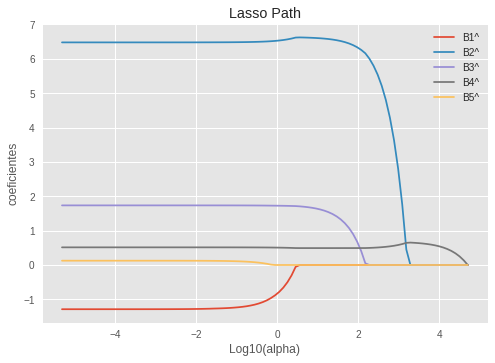

In [0]:
# Ok... eso fue para un valor de alpha ¿Qué pasa con otros valores?
lm_lasso_sk = lm.Lasso()

alphas=10**np.linspace(5,-5,100)*0.5

coefs = []
for a in alphas:
    lm_lasso_sk.set_params(alpha=a)
    lm_lasso_sk.fit(Xh[:,1:], Y2)
    coefs.append(lm_lasso_sk.coef_)
    
log_alphas = np.log10(alphas)
    
plt.plot(log_alphas, coefs)
plt.xlabel('Log10(alpha)')
plt.ylabel('coeficientes')
plt.title('Lasso Path')
plt.legend(labels=["B1^","B2^","B3^","B4^","B5^"])
plt.show()

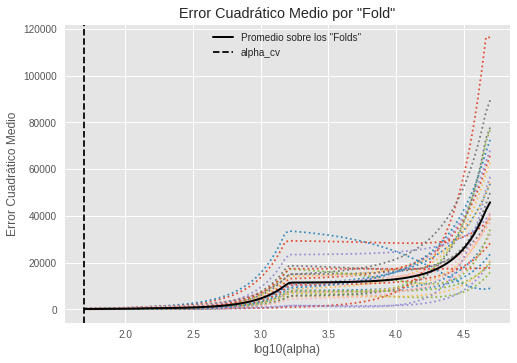

In [0]:
# hummm... ¿Pero qué alpha elegir?

# Una alternativa es usar validación cruzada para encontrar un buen alpha...
cv_model = lm.LassoCV(cv=30).fit(Xh[:,1:], Y2)

m_log_alphas = np.log10(cv_model.alphas_)
plt.figure()
plt.plot(m_log_alphas, cv_model.mse_path_, ':')
plt.plot(m_log_alphas, cv_model.mse_path_.mean(axis=-1), 'k',
         label='Promedio sobre los "Folds"', linewidth=2)
plt.axvline(np.log10(cv_model.alpha_), linestyle='--', color='k',
            label='alpha_cv')

plt.legend()
plt.xlabel('log10(alpha)')
plt.ylabel('Error Cuadrático Medio')
plt.title('Error Cuadrático Medio por "Fold"')
plt.show()

In [0]:
# El modelo con el mejor valor de alpha es...
alpha_cv = cv_model.alpha_
lm_lasso_sk = lm.Lasso(alpha=alpha_cv)
lm_lasso_sk.fit(Xh[:,1:], Y2)
print(alpha_cv)
print(lm_lasso_sk.intercept_)
print(lm_lasso_sk.coef_)

49.65858077740166
44.673341231560016
[-0.          6.47519998  1.18233554  0.4924165  -0.        ]


In [0]:
# Por último calculemos nuestro AIC...
k_lasso = 4
SCR_lasso = sum(np.power((lm_lasso_sk.predict(Xh[:,1:])-Y2),2))
AIC_lasso = 2*k_lasso+n*np.log(SCR_lasso/n)+n*np.log(2*np.pi)+n
print(AIC_lasso)

785.4554026596087


## 4  Caso de estudio

Ahora vamos a repasar todo lo que aprendimos para plantear un modelo usando datos reales. Al mismo tiempo aprovecharemos para aprender sobre la marcha algunas prácticas comunes.

__Modelo propuesto__

De acuerdo a la descripción de la base de datos, puede ser interesante predecir el factor de riesgo de los autos respecto a las demás variables. Este factor es representado por la varaible "symboling". 

### 4.1 Pre-procesamiento

In [0]:
# Cargemos los datos
from google.colab import files
uploaded = files.upload()

Saving automobile_data_set.txt to automobile_data_set (2).txt


In [0]:
# Usaremos pandas
import pandas as pd

# Primero importemos los datos...
data = pd.read_csv("automobile_data_set.txt",sep=',',header=None)
data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25],
           dtype='int64')

In [0]:
data.columns = ["symboling", "normalized-losses", "make", "fuel-type",
                "aspiration", "num-of-doors", "body-style",
                "drive-wheels", "engine-location", "wheel-base",
                "length", "width", "height", "curb-weight",
                "engine-type", "num-of-cylinders", "engine-size",
                "fuel-system", "bore", "stroke", "compression-ratio",
                "horsepower","peak-rpm", "city-mpg",
                "highway-mpg","price"]
data.shape

(205, 26)

In [0]:
# Veamos las primeras filas...
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [0]:
# Definamos los valores perdidos...
data = data.replace('?', np.nan)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [0]:
# Quitemos los valores perdidos...
data = data.dropna(axis=0, how='any')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [0]:
# Veamos si nuestras variables tienen formatos adecuados...
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [0]:
# Ajustemos las variables numéricas... 
data = data.apply(pd.to_numeric, errors='ignore')
data.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

__Variable de Respuesta__

Extraigamos la variable de respuesta. Notemos que esta variable puede tomar valores enteros entre -3 y 3. Es decir, podríamos tratarla como una variable categórica ordinal, sin embargo dado que el rango no es tan pequeño, por fines de modelación, podemos tratar esta variable como continua. 

In [0]:
Yresp = data["symboling"]
Yresp.describe()

count    159.000000
mean       0.735849
std        1.193086
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symboling, dtype: float64

__Matriz de datos__

Ahora definamos nuestra matriz de datos...

In [0]:
# Primero tomemos el resto de varaibles numéricas...
Xnum = data.iloc[:,[1,9,10,11,12,13,16,18,19,20,21,22,23,24,25]]
Xnum.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.132075,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560
std,35.651285,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195
min,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,94.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000
50%,113.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000
75%,148.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


In [0]:
# Ahora tomemos las variables categóricas...

# Necesitamos transformarlas
Xcat = pd.get_dummies(data.iloc[:,[2,3,4,5,6,7,8,14,15,17]])
Xcat.head()

,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,make_nissan,...,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
8,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [0]:
Xcat.columns

Index(['make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mitsubishi',
       'make_nissan', 'make_peugot', 'make_plymouth', 'make_porsche',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel-type_diesel', 'fuel-type_gas', 'aspiration_std',
       'aspiration_turbo', 'num-of-doors_four', 'num-of-doors_two',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_4wd',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-location_front',
       'engine-type_dohc', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'num-of-cylinders_eight',
       'num-of-cylinders_five', 'num-of-cylinders_four',
       'num-of-cylinders_six', 'num-of-cylinders_three', 'fuel-system_1bbl',
       'fuel-system_2bbl', 'fuel-system_idi', 'fuel-system_mfi',
       'f

In [0]:
# Ahora debemos recordar que el rango de nuestra 
# matriz X debe ser completo...

# Resolvamos esto...
Xcat = Xcat.drop(['make_audi','fuel-type_diesel','aspiration_std',
                  'num-of-doors_four','body-style_convertible',
                   'drive-wheels_4wd','engine-location_front',
                  'engine-type_dohc','num-of-cylinders_eight',
                   'fuel-system_1bbl'],axis=1)
Xcat.head()

,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,make_nissan,make_peugot,...,engine-type_ohcv,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
10,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [0]:
# Ahora si... nuestra matriz de datos es...
Xdata = Xnum.join(Xcat)
Xdata.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,...,engine-type_ohcv,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,...,0,0,1,0,0,0,0,0,1,0
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,...,0,1,0,0,0,0,0,0,1,0
6,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,...,0,1,0,0,0,0,0,0,1,0
8,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,...,0,1,0,0,0,0,0,0,1,0
10,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,...,0,0,1,0,0,0,0,0,1,0


__Datos de entrenamiento y Datos de testeo__

Ahora separemos nuestros datos...

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xdata, Yresp,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((127, 54), (127,), (32, 54), (32,))

### 4.2 Modelación

In [0]:
# Usemos sklearn...
lm_cars = lm.LinearRegression()
lm_cars.fit(X_train,Y_train)
print("B^_0 = "+str(lm_cars.intercept_))
for var, c in zip(X_train.columns, lm_cars.coef_):
    print("B^_"+str(var)+" = "+str(c))

B^_0 = 7.757832546054217
B^_normalized-losses = 0.00869441475703807
B^_wheel-base = -0.014823618011167442
B^_length = -0.022729160546560323
B^_width = 0.02641952864853443
B^_height = -0.11504019534608302
B^_curb-weight = -0.00032475515314045467
B^_engine-size = 0.008729520415810654
B^_bore = 0.35420012505317683
B^_stroke = -0.31908129773449906
B^_compression-ratio = 0.2513025399022973
B^_horsepower = -0.0014753933708389066
B^_peak-rpm = 0.00022745717565220147
B^_city-mpg = -0.07852918534404311
B^_highway-mpg = 0.06138792506437357
B^_price = -1.6697010157289485e-05
B^_make_bmw = -2.2018289685041834
B^_make_chevrolet = -2.0099229614519776
B^_make_dodge = -2.3213720008888794
B^_make_honda = -1.0879828906561808
B^_make_jaguar = -1.6464267693063768
B^_make_mazda = -1.5112374212413688
B^_make_mercedes-benz = -1.712099280153884
B^_make_mitsubishi = -1.398920153584951
B^_make_nissan = -1.5351980336935867
B^_make_peugot = -0.938316635838043
B^_make_plymouth = -2.018440181316563
B^_make_porsche 

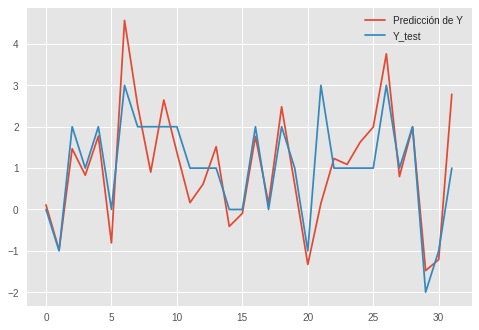

In [0]:
# Veamos que tan bien podemos predecir...
plt.plot(lm_cars.predict(X_test), label="Predicción de Y")
plt.plot(np.array(Y_test), label="Y_test")
plt.legend()
plt.show()

In [0]:
# Calclulemos el AIC...
k_cars = 54
n_cars = X_test.shape[0]

SCR_cars = sum(np.power(lm_cars.predict(X_test)-Y_test,2))
AIC_cars = 2*k_cars+n_cars*np.log(SCR_cars/n_cars)+\
           n_cars*np.log(2*np.pi)+n_cars
print(AIC_cars)

185.8393041857488


In [0]:
# Y el error de predicción promedio es...
print(SCR_cars/n_cars)

0.6667108664674644


### 4.3 Selección de variables

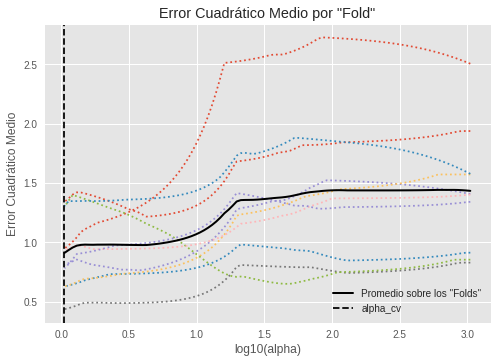

In [0]:
# Son demasiadas varaibles en el modelo y sería 
# útil tener un modelo reducido...

# Lastimosamente no sabemos nada sobre autos asi que 
# proponer predictores no es una alternativa...
# Podríamos usar stepwise pero sería muy tedioso...
# Al parecer este es un buen trabajo para LASSO...

# Primero usemos validación cruzada
cv_cars_model = lm.LassoCV(cv=10).fit(X_train, Y_train)

m_log_alphas = np.log10(cv_cars_model.alphas_)
plt.figure()
plt.plot(m_log_alphas, cv_cars_model.mse_path_, ':')
plt.plot(m_log_alphas, cv_cars_model.mse_path_.mean(axis=-1), 'k',
         label='Promedio sobre los "Folds"', linewidth=2)
plt.axvline(np.log10(cv_cars_model.alpha_), linestyle='--', color='k',
            label='alpha_cv')

plt.legend()
plt.xlabel('log10(alpha)')
plt.ylabel('Error Cuadrático Medio')
plt.title('Error Cuadrático Medio por "Fold"')
plt.show()

In [0]:
alpha_cars = cv_cars_model.alpha_
lm_cars_lasso = lm.Lasso(alpha=alpha_cars)
lm_cars_lasso.fit(X_train, Y_train)
print("alpha = "+str(alpha_cars))
print("B^_0 = "+str(lm_cars_lasso.intercept_))
for var, c in zip(X_train.columns, lm_cars_lasso.coef_):
    print("B^_"+str(var)+" = "+str(c))

alpha = 1.0536666873333747
B^_0 = 3.7320089341266622
B^_normalized-losses = 0.017272441268090095
B^_wheel-base = -0.03664671960804966
B^_length = -0.0
B^_width = 0.0
B^_height = -0.0
B^_curb-weight = -0.0008707733367852705
B^_engine-size = 0.0028937346041850815
B^_bore = -0.0
B^_stroke = -0.0
B^_compression-ratio = 0.0
B^_horsepower = 0.003106004711476113
B^_peak-rpm = -2.4679982434402367e-05
B^_city-mpg = 0.0
B^_highway-mpg = 0.0
B^_price = 9.10463334083159e-06
B^_make_bmw = -0.0
B^_make_chevrolet = 0.0
B^_make_dodge = -0.0
B^_make_honda = -0.0
B^_make_jaguar = -0.0
B^_make_mazda = -0.0
B^_make_mercedes-benz = 0.0
B^_make_mitsubishi = 0.0
B^_make_nissan = -0.0
B^_make_peugot = -0.0
B^_make_plymouth = -0.0
B^_make_porsche = 0.0
B^_make_saab = 0.0
B^_make_subaru = 0.0
B^_make_toyota = 0.0
B^_make_volkswagen = 0.0
B^_make_volvo = -0.0
B^_fuel-type_gas = -0.0
B^_aspiration_turbo = -0.0
B^_num-of-doors_two = 0.0
B^_body-style_hardtop = 0.0
B^_body-style_hatchback = 0.0
B^_body-style_sedan 

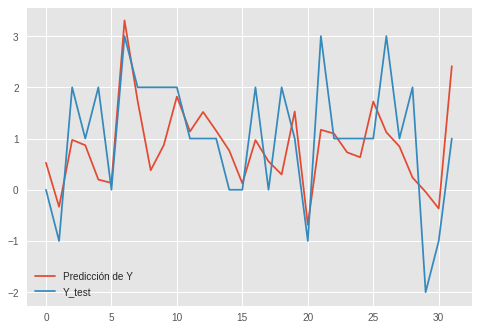

In [0]:
# Veamos que tan bien podemos predecir...
plt.plot(lm_cars_lasso.predict(X_test), label="Predicción de Y")
plt.plot(np.array(Y_test), label="Y_test")
plt.legend()
plt.show()

In [0]:
# Un buen trabajo considerando que usamos menos variables...
print("B^_0 = "+str(round(lm_cars_lasso.intercept_,4)))
for var, c in zip(X_train.columns, lm_cars_lasso.coef_):
    if(abs(c)>0):
        print("B^_"+str(var)+" = "+str(c))

B^_0 = 3.732
B^_normalized-losses = 0.017272441268090095
B^_wheel-base = -0.03664671960804966
B^_curb-weight = -0.0008707733367852705
B^_engine-size = 0.0028937346041850815
B^_horsepower = 0.003106004711476113
B^_peak-rpm = -2.4679982434402367e-05
B^_price = 9.10463334083159e-06


In [0]:
# Calculemos el AIC...
k_cars_lasso = 8

SCR_cars_lasso = sum(np.power(lm_cars_lasso.predict(X_test)-Y_test,2))
AIC_cars_lasso = 2*k_cars_lasso+n_cars*np.log(SCR_cars_lasso/n_cars)\
                 +n_cars*np.log(2*np.pi)+n_cars
print(AIC_cars_lasso)

106.48585330015695


In [0]:
# Y el error de predicción promedio es...
print(SCR_cars_lasso/n_cars)

0.9898576334607823


### 4.5 Notas finales sobre el caso

En muy poco tiempo logramos obtener un modelo parsimonioso para predecir el riesgo de los autos, definido por la variable "Symboling", considerando solo siete variables. Sin duda esto puede ser un gran aporte para los actuarios que trabajan en la industria automotriz.

Por otra parte, este caso no puede darse por concluido. Aún hay ciertas tareas que podemos realizar para obtener un estudio más sólido:

* Proponer un modelo imputando valores faltantes.
* Identificar outliers y efectuar un trataminto adecuado.
* Efectuar análisis gráficos.
* Realizar inferencias sobre los parámetros considerando que usamos LASSO.
* Analizar los residuos del modelo ¿Se cumplirán los supuestos?
* Obtener un modelo reducido usando stepwise
* Efectuar una regresión considerando que la respueta es categórica (Ej. Regresión logística) 
* Proponer otros modelos de regresión (GLM, RandomForest, etc.)

## 5 Referencias

__Libros y papers__
* G. James, D. Witten, T. Hastie, R. Tibshirani (2013). An Introduction to Statistical Learning. 205-227.
* Hastie, Tibshirani, Friedman (2008). The Elements of Statistical Machine Learning. 57 - 73
* Kevin P. Murphy (2012). Machine learning, A probabilistic Perspective. 217 - 221.
* Jesús R. Salazar (2017). Data Science and Analytics with Python. 131-179. 
* Ana González Vidal (2015). Selección de variables: Una revisión de métodos existentes.
* Tibshirani, R. (1996). Regression Shrinkage and Selection via the Lasso. Journal of the Royal Statistical Society. Series B (Methodological), 58(1), 267-288.
* Valeria Fonti (2017). Feature Selection using LASSO. VU Amsterdam.

__Páginas web__
* https://stats.stackexchange.com/questions/246047/independent-variable-random-variable
* https://math.stackexchange.com/questions/337291/unconditional-expectation-vs-conditional-expectation-in-regressions-does-it-re
* http://cs229.stanford.edu/notes/cs229-notes1.pdf
* http://www.real-statistics.com/multiple-regression/standardized-regression-coefficients/
* https://stats.stackexchange.com/questions/214682/stepwise-regression-in-r-how-does-it-work/343389#343389
* http://statweb.stanford.edu/~tibs/lasso.html
* https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
* https://stats.stackexchange.com/questions/7935/what-are-disadvantages-of-using-the-lasso-for-variable-selection-for-regression
* http://scikit-learn.org/stable/modules/linear_model.html#lasso

__Datos__
* https://archive.ics.uci.edu/ml/datasets/Automobile